# 미분 : 
# 분산 : (sigma(관측치 - 평균)^2) / n-1
# 표준편차 : root((sigma(관측치 - 평균)^2) / n-1)
# 공분산 : sigma(x - xbar)*(y - yvar) / n-1
# 상관계수 : (sigma(x - xbar)*(y - yvar) / n-1) / (xsigma * ysigma) : -1 ~ 1
# 거리값 : 각 요소의 차의 제곱을 루트로 구함
# model 평가 : MSE(mean square error) : 연속된 수치인 경우의 평가
#             RMSE(root)
# 신경망에서 cost function 비용함수 : (예측치 - 관측치) -> back propagation
#                                               (역전파를 통해서 가중치를 수정)

# 국어, 수학 점수 vector: 상관계수가 높다, 내적 1:

# 회귀분석 , 상관분석
- 회귀분석 다중공선성 : 종속변수가 과하게 영향을 받을 수 있음.
- 회귀분석 자기상관성(Autocorelation)이 존재 : -> 시계열 분석
- 시계열분석 ARMA (Autocorelation + Moving Average)
    - 이동평균법(주파수를 줄여줌 -> 복잡하면 분석 불가)
    - 자기상관성 ( 오늘데이터가 내일 영향을 미치고 모레 영향을 미치는것.)
    - 정상성을 띈 데이터에만 가능
- 비정상 -> 정상성
- 이렇게 함에도 정확한 정상성을 띈 데이터가 없어서 만든것이
- ARIMA(Integrated) 통합 -> 비정상성을 띈 데이터에도 가능
- pandas 는 시계열 분석을 지원 (시간 index를 지원)

In [1]:
import numpy as np
from statistics import *
x=np.array([7,8,9])
y=np.array([9,10,12])
print(y.mean()) # 통계 : 중위수(medians)
# 공 분산 행열 
print("공분산",np.cov(x,y))
# 상관계수 행열 (열 2, 행 2)
print("상관계수",np.corrcoef(x,y))

10.333333333333334
공분산 [[1.         1.5       ]
 [1.5        2.33333333]]
상관계수 [[1.         0.98198051]
 [0.98198051 1.        ]]


In [2]:
arr = np.array([[1,2,3],[4,5,6],[7,8,9]])
print("원본",'\n',arr)
print("누적합(행)=",'\n', arr.cumsum(0))
print("누적곱(열)=",'\n',arr.cumprod(1))
print("배열의합계=",arr.sum())
print("열방향으로의 합계(행평균)= \n",arr.mean(axis=1), end ="\n") # 행방향과 열방향의 구분
print("행방향으로의 합계= \n",arr.sum(0)) # 열별 합계

원본 
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
누적합(행)= 
 [[ 1  2  3]
 [ 5  7  9]
 [12 15 18]]
누적곱(열)= 
 [[  1   2   6]
 [  4  20 120]
 [  7  56 504]]
배열의합계= 45
열방향으로의 합계(행평균)= 
 [2. 5. 8.]
행방향으로의 합계= 
 [12 15 18]


In [4]:
# 가중치(변수 중요도)를 부여한다는 의미:
a = np.array([1,2,3,4])
wts = np.array([4,3,2,1])
print(np.average(a,weights=wts))
std = np.sqrt(np.mean(abs(a-a.mean())**2))
print(np.var([1,2,3,4])) # 분산
print(np.std([1,2,3,4]))  #표준편차

2.0
1.25
1.118033988749895


# matplotlib, seaborn, pandas.plot
- matplotlib
- %matplotlib inline을 사용해야 출력 (pycharm은 사용X)

data1 : mean=100.776 stdv= 19.620
data2 : mean=151.050 stdv= 22.358


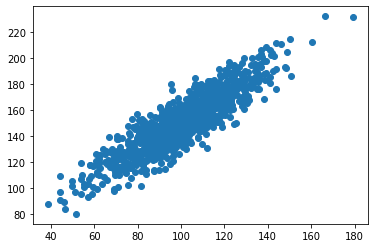

In [5]:
%matplotlib inline
from numpy import mean # 메모리 낭비를 줄일수 있기에.
from numpy import std
from numpy.random import randn # 서브 패키지 : linalg, random, fft(푸리에 변환)
# poly(다차방정식)
from numpy.random import seed # random : 의사난수(데이터 출력순서 정해짐)
from matplotlib import pyplot  
seed(1) # 같은 수 가 발생
data1 = 20 * randn(1000) + 100 # randn 정규분포
data2 = data1 + (10 * randn(1000) + 50)
print('data1 : mean=%.3f stdv= %.3f' % (mean(data1), std(data1)))
print('data2 : mean=%.3f stdv= %.3f' % (mean(data2), std(data2)))
pyplot.scatter(data1,data2) # 산포도 출력
pyplot.show()

In [13]:
randn(10)

array([ 0.48259795, -1.10543235,  0.4207552 ,  1.61679423, -0.88377132,
        0.29883502,  0.7671131 , -1.69334871,  1.63888893, -1.04499819])

In [17]:
import matplotlib.pyplot as plt
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


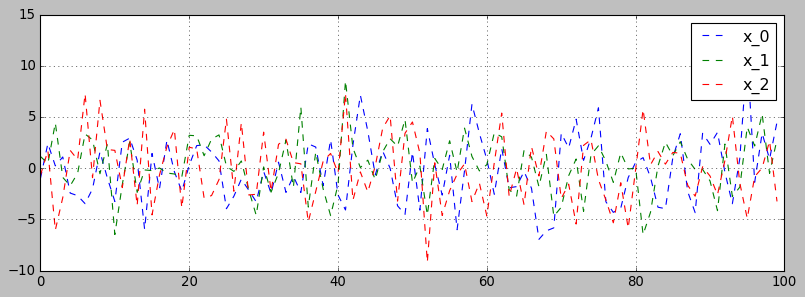

In [18]:
plt.style.use(['classic']) # 표 모양 선정 /*********
xs= np.random.normal(0,3,(100,3)) # 평균이 0, 표준편차:3, 100*3 데이터 생성
plt.figure(figsize=(12,4)) # 모양을 결정
for i in range(0,3):
    x = xs[:,i]
    plt.plot(range(0, len(x)), x, linewidth=1,linestyle='--',label='x_{}'.format(i))
plt.legend() # 범례
plt.grid() # 격자선
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

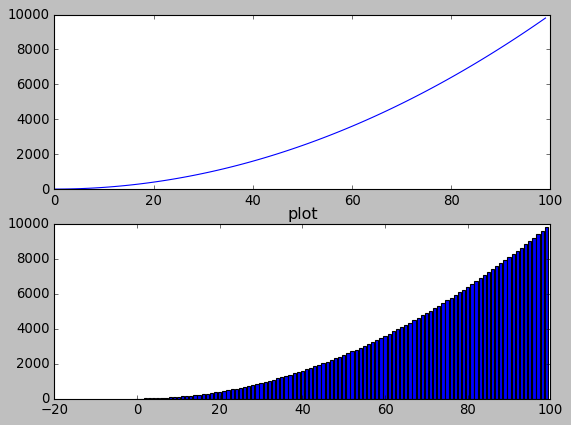

In [19]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1) # 2행 1열
ax2 = fig.add_subplot(2,1,2) # 

x = range(0,100)
y= [v*v for v in x]

ax1.plot(x,y)
ax2.bar(x,y)
plt.title("plot")
plt.show

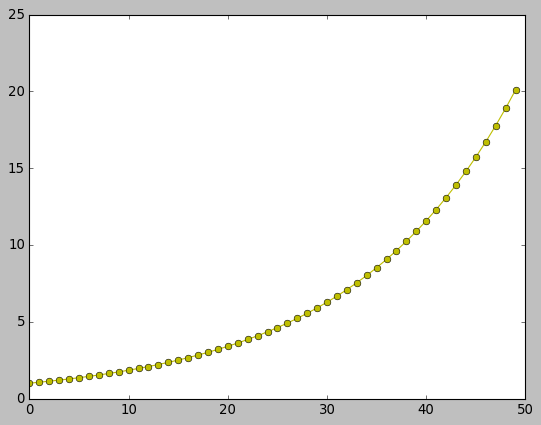

In [31]:
x1 = np.linspace(0.0,5.0)
x2 = np.linspace(0.0,3.0)

plt.plot(np.exp(x2), 'yo-') #지수함수 그래프
plt.show()

AxesSubplot(0.125,0.536364;0.775x0.363636)
AxesSubplot(0.125,0.1;0.775x0.363636)


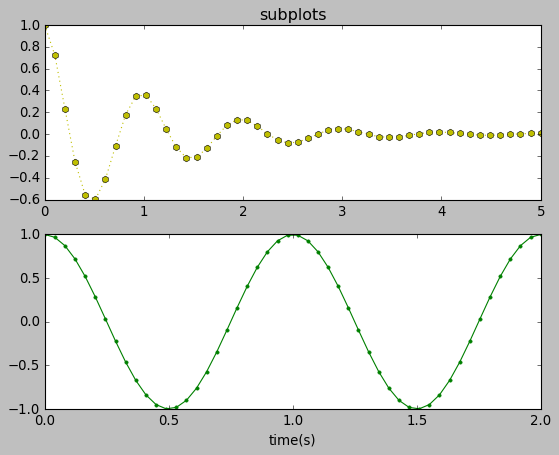

In [21]:
y1 = np.cos(2*np.pi*x1)*np.exp(-x1)
y2 = np.cos(2*np.pi*x2)
ax1 = plt.subplot(2,1,1)
plt.plot(x1,y1,'yh:') # YELLOW, point marking, linetype
plt.title('subplots')
print(ax1)
ax2 = plt.subplot(2,1,2)
plt.plot(x2,y2,'g.-')
plt.xlabel('time(s)')
print(ax2)
plt.show()

In [26]:
y = np.sin(2*np.pi*x2)
y

array([ 0.00000000e+00,  2.53654584e-01,  4.90717552e-01,  6.95682551e-01,
        8.55142763e-01,  9.58667853e-01,  9.99486216e-01,  9.74927912e-01,
        8.86599306e-01,  7.40277997e-01,  5.45534901e-01,  3.15108218e-01,
        6.40702200e-02, -1.91158629e-01, -4.33883739e-01, -6.48228395e-01,
       -8.20172255e-01, -9.38468422e-01, -9.95379113e-01, -9.87181783e-01,
       -9.14412623e-01, -7.81831482e-01, -5.98110530e-01, -3.75267005e-01,
       -1.27877162e-01,  1.27877162e-01,  3.75267005e-01,  5.98110530e-01,
        7.81831482e-01,  9.14412623e-01,  9.87181783e-01,  9.95379113e-01,
        9.38468422e-01,  8.20172255e-01,  6.48228395e-01,  4.33883739e-01,
        1.91158629e-01, -6.40702200e-02, -3.15108218e-01, -5.45534901e-01,
       -7.40277997e-01, -8.86599306e-01, -9.74927912e-01, -9.99486216e-01,
       -9.58667853e-01, -8.55142763e-01, -6.95682551e-01, -4.90717552e-01,
       -2.53654584e-01, -4.89858720e-16])

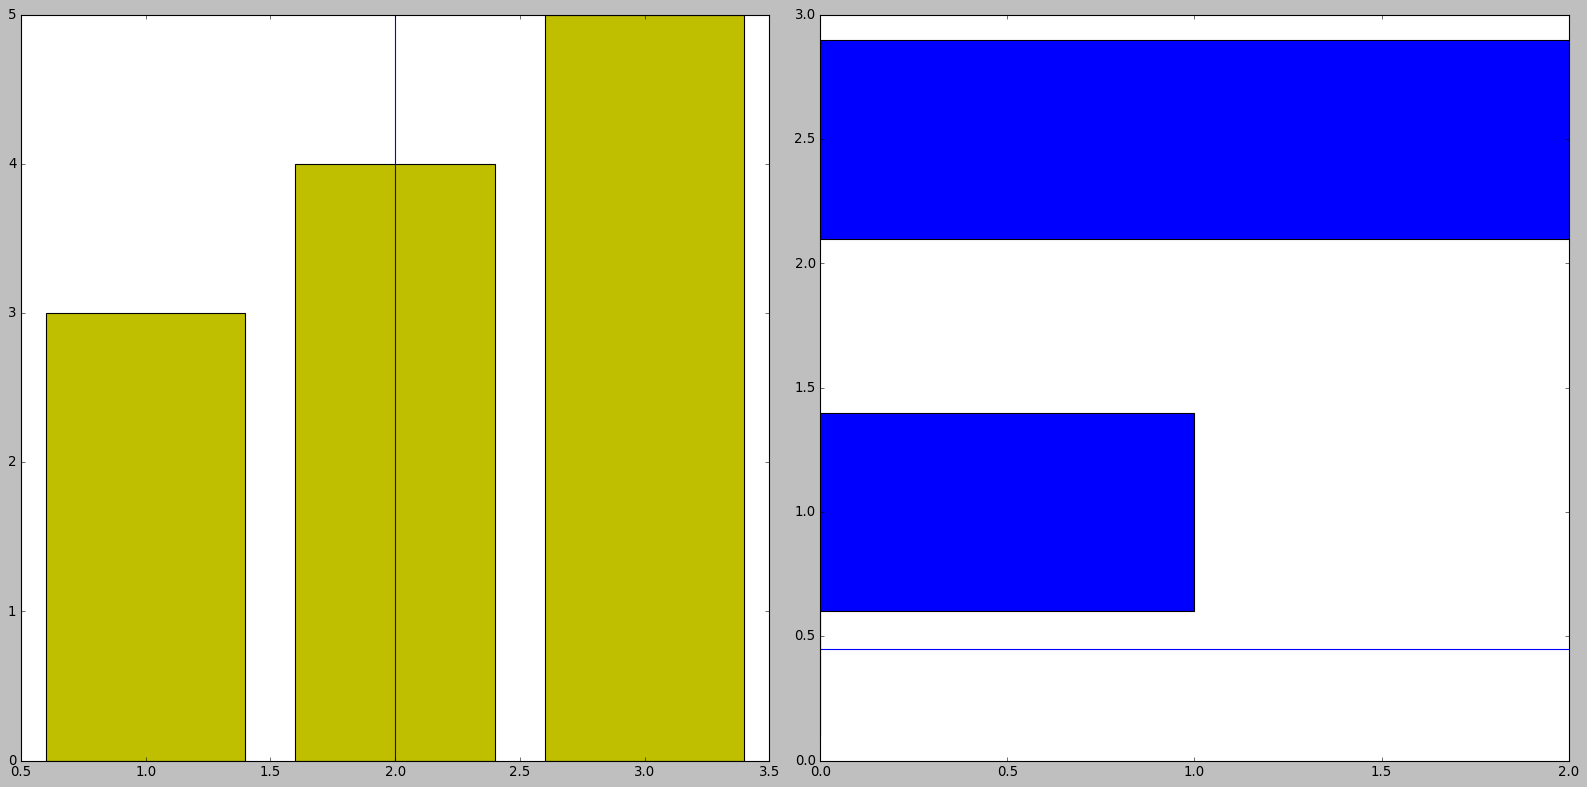

In [48]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
# 이산형 막대그래프 , 연속형그래프 :histogram
ax1.bar([1,2,3],[3,4,5], color = 'y')
ax2.barh([0.5,1,2.5],[0,1,2]) # v: vertical 수직으로, h:horizontal 수평으로
ax1.axvline(2)
ax2.axhline(0.45)
plt.tight_layout() # 여백을 줄여서 표현
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x270428d7408>,
 'caps': [<matplotlib.lines.Line2D at 0x270428d78c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2704297e4c8>],
 'medians': [<matplotlib.lines.Line2D at 0x2704297bd48>],
 'fliers': [<matplotlib.lines.Line2D at 0x2704298c408>],
 'means': []}

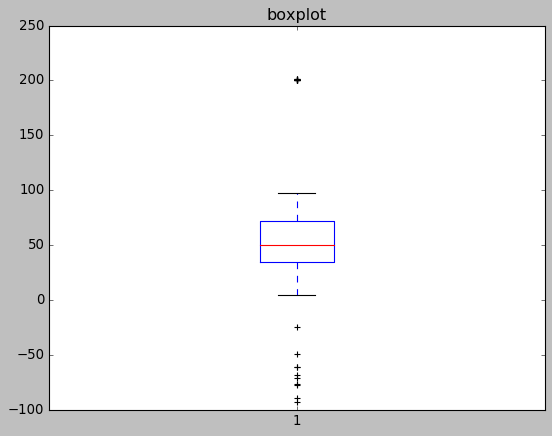

In [24]:
# boxplot
# IQR( inter quantile range = 3 사분위수 - 1사분위수 )
# IQR * +-1.5 : 상한선
np.random.seed(19680801)
spread = np.random.rand(50)*100
center = np.ones(25)*50
filer_high = np.random.rand(10)+100+100 # 산한선을 넘는 데이터
filer_low = np.random.rand(10)* -100
data = np.concatenate((spread,center,filer_high,filer_low))
fig1, ax1 = plt.subplots() # 형태를 제어, 도화지.
ax1.set_title('boxplot')
ax1.boxplot(data)

{'whiskers': [<matplotlib.lines.Line2D at 0x27042c3ccc8>,
 'caps': [<matplotlib.lines.Line2D at 0x27042c2be88>,
 'boxes': [<matplotlib.lines.Line2D at 0x27042c57908>],
 'medians': [<matplotlib.lines.Line2D at 0x27042a5cf88>],
 'fliers': [<matplotlib.lines.Line2D at 0x27042a5cf08>],
 'means': []}

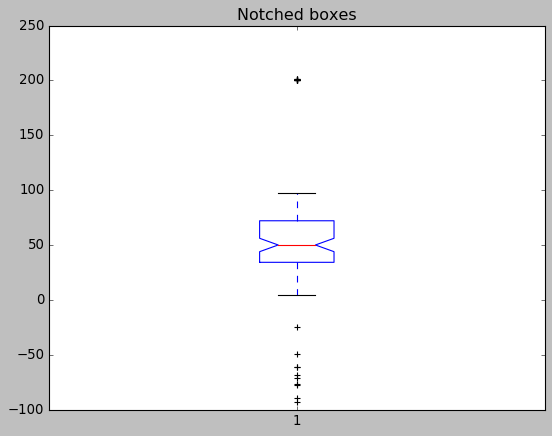

In [25]:
fig2, ax2 = plt.subplots()
ax2.set_title('Notched boxes') # 홈이 95% 신뢰구간
ax2.boxplot(data, notch=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1536b377548>,
 'caps': [<matplotlib.lines.Line2D at 0x1536b377f08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1536b38d988>],
 'medians': [<matplotlib.lines.Line2D at 0x1536b37bec8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1536b313ec8>],
 'means': []}

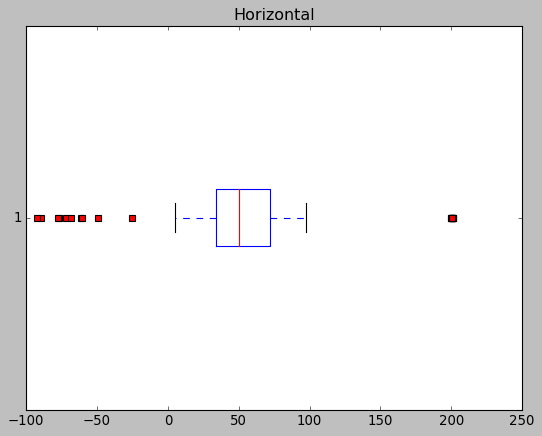

In [23]:
# vertical 수직의 , horizontal 수평의
red_square = dict(markerfacecolor='r',marker='s') # square
fig5, ax5 = plt.subplots()
ax5.set_title('Horizontal')
ax5.boxplot(data, vert=False, flierprops=red_square) # 이상치 표현을 제어하기위해서

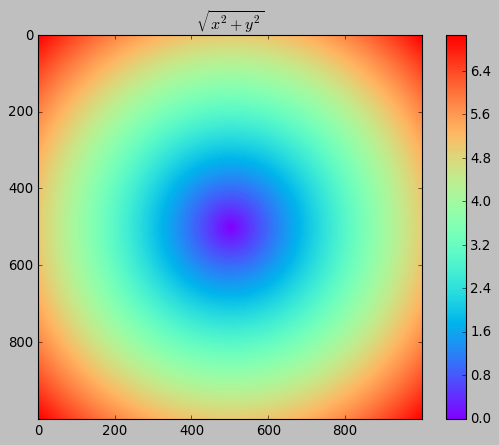

In [51]:
# meshgrid 그물망 격자
# 그래프에 수식 :latex 문법
points=np.arange(-5,5,0.01) # 1000
xs,ys=np.meshgrid(points,points)
z= np.sqrt(xs**2 + ys**2) # 거리값

plt.imshow(z,cmap=plt.cm.rainbow); # 데이터를 이미지로 출력하라
plt.colorbar()  # 컬러별 수의 크기값을 출력
plt.title("$\sqrt{x^2+y^2}$") # latex 문법
plt.show()

In [58]:
# CNN (Convo)
print(np.meshgrid(np.arange(-5,5,0.1)))

[array([-5.00000000e+00, -4.90000000e+00, -4.80000000e+00, -4.70000000e+00,
       -4.60000000e+00, -4.50000000e+00, -4.40000000e+00, -4.30000000e+00,
       -4.20000000e+00, -4.10000000e+00, -4.00000000e+00, -3.90000000e+00,
       -3.80000000e+00, -3.70000000e+00, -3.60000000e+00, -3.50000000e+00,
       -3.40000000e+00, -3.30000000e+00, -3.20000000e+00, -3.10000000e+00,
       -3.00000000e+00, -2.90000000e+00, -2.80000000e+00, -2.70000000e+00,
       -2.60000000e+00, -2.50000000e+00, -2.40000000e+00, -2.30000000e+00,
       -2.20000000e+00, -2.10000000e+00, -2.00000000e+00, -1.90000000e+00,
       -1.80000000e+00, -1.70000000e+00, -1.60000000e+00, -1.50000000e+00,
       -1.40000000e+00, -1.30000000e+00, -1.20000000e+00, -1.10000000e+00,
       -1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -1.77635684e-14,  1.00000000e-01,
        2.00000000e-01, 

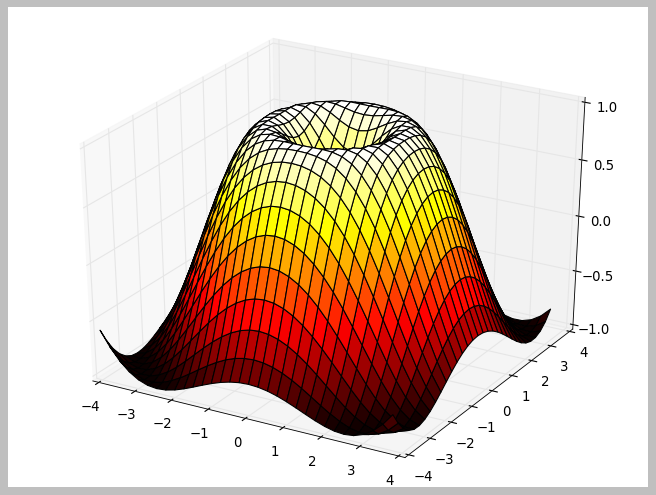

In [28]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-4,4,0.25) #0,0
Y = np.arange(-4,4,0.25)
X,Y = np.meshgrid(X,Y) # 좌표점 -4,-3.75,3.5
R = np.sqrt(X**2 + Y**2) # 거리값
# Z = R
Z = np.sin(R)
ax.plot_surface(X,Y,Z,rstride=1, cstride=1,cmap='hot')
plt.show()
ax.plot_surface(X,Y,Z,rstride=1, cstride=1, cmap=plt.cm.rainbow)
plt.show()

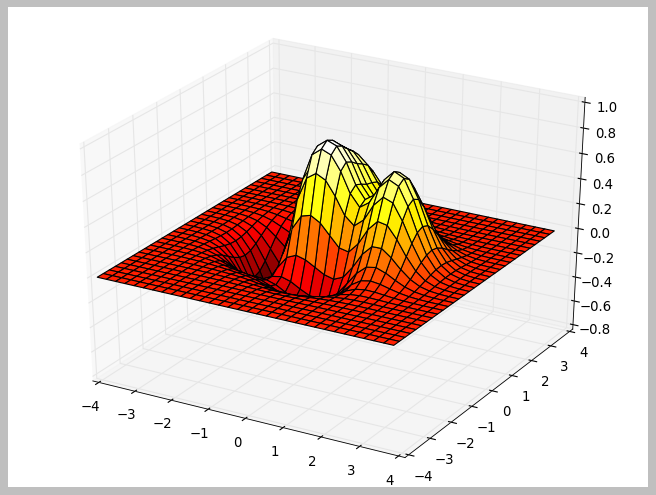

In [29]:
from mpl_toolkits.mplot3d import Axes3D
# 방정식
def f(x,y): return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)
fig = plt.figure()
ax = Axes3D(fig)
X= np.arange(-4,4,0.25)
Y= np.arange(-4,4,0.25)
X,Y = np.meshgrid(X,Y)
Z= np.sin(f(X,Y))
# row, colums
ax.plot_surface(X,Y,Z,rstride= 1,cstride=1,cmap='hot')
plt.show()

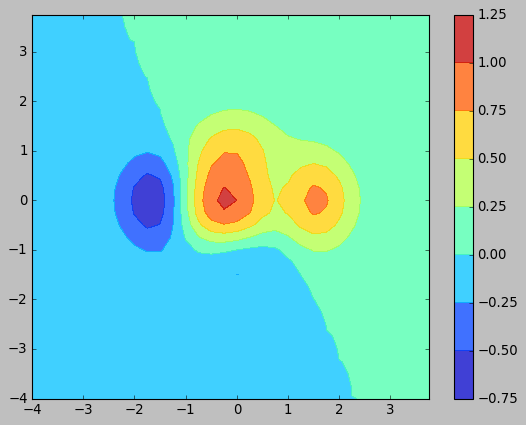

In [30]:
plt.contourf(X,Y,f(X,Y),8,alpha=.75,cmap='jet')
plt.colorbar()
plt.show()

[0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0]


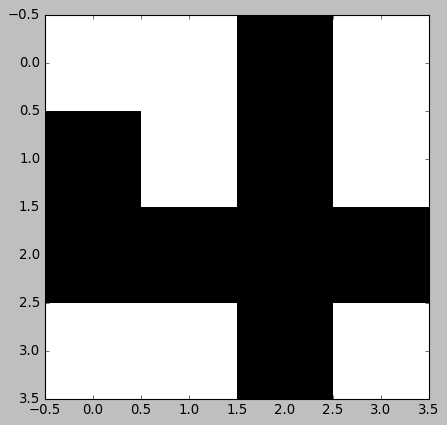

In [31]:
a = [0,0,1,0,
    1,0,1,0,
    1,1,1,1,
    0,0,1,0]
np1 = np.array(a)
print(np1)
plt.imshow(np1.reshape(4,4), cmap='Greys', interpolation='nearest') # 보간법 "컬러값이 지정되지않으면
# 보간해서 적용해라"
plt.show()

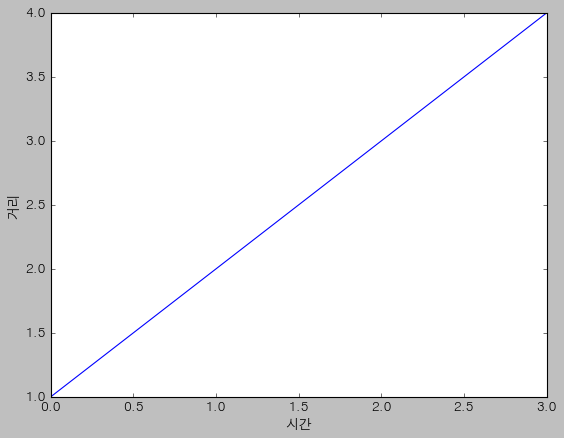

In [34]:
%matplotlib inline
from matplotlib import font_manager,rc
import matplotlib
import matplotlib.pyplot as plt
plt.style.use(['classic'])
font_path = "C:/Windows/Fonts/H2GTRM.TTF" # 윈도우 모든폰트있는곳
font_name = font_manager.FontProperties(fname=font_path).get_name() # 폰트 이름 획득
# resource configuration 폰트이름
matplotlib.rc('font',family=font_name)
plt.plot([1,2,3,4])
plt.xlabel("시간")
plt.ylabel("거리")
plt.show()

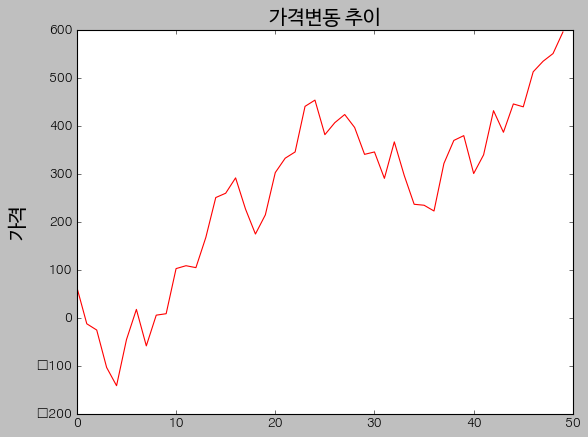

In [43]:
import matplotlib.font_manager as fm
path = 'C:\\Windows\\Fonts\\NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=path, size = 18)
data = np.random.randint(-100,100,50).cumsum()# 누적합계
data
plt.plot(range(50), data , 'r')
plt.title('가격변동 추이', fontproperties=fontprop)
plt.ylabel('가격', fontproperties=fontprop)
plt.show()

Text(0, 0.5, 'f(x)')

findfont: Font family ['바탕'] not found. Falling back to DejaVu Sans.
findfont: Font family ['바탕'] not found. Falling back to DejaVu Sans.


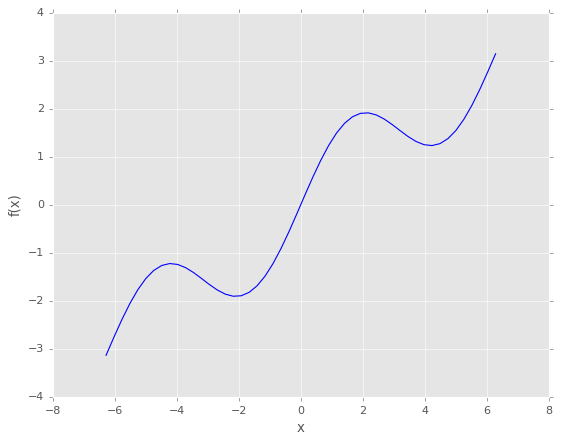

In [45]:
from pylab import plt
plt.style.use('ggplot')
import matplotlib as mpl
mpl.rcParams['font.family'] = '바탕'
def f(x):
    return np.sin(x) + 0.5 * x # 주기함수
x = np.linspace(-2 * np.pi, 2* np.pi,50)
plt.plot(x,f(x),'b')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [46]:
# 최소 제곱법을 이용해서 fitting 적합

Text(0, 0.5, 'f(x)')

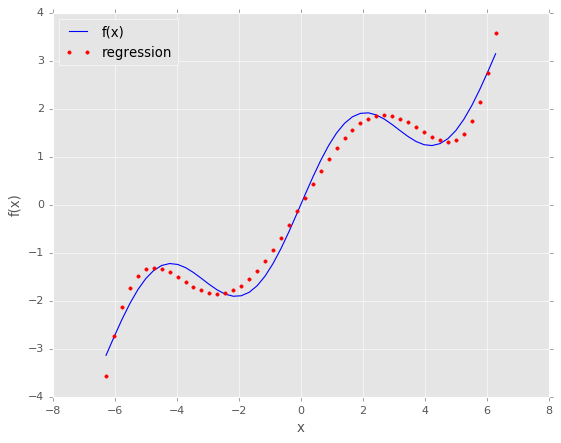

In [51]:
# polyfit : 다차방적식으로 fitting(적합)
reg = np.polyfit(x,f(x),deg=5) # 5차 방정식으로 fitting해라
ry = np.polyval(reg,x) # 5차방정식으로 회귀

plt.plot(x,f(x),'b',label='f(x)') #원본데이터
plt.plot(x, ry, 'r.',label='regression') #최소제곱법으로 피팅
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [60]:
# 지리정보 시스템
import folium
map_1 = folium.Map(location=[37.565711,126.978090],
                  zoom_start=16 )#,
                 # tiles='Stamen Terrain')
folium.Marker([37.565711,126.978090], popup='서울시청').add_to(map_1)
folium.Marker([37.565711,126.978190], popup='서울시청및',icon=folium.Icon(icon='cloud')).add_to(map_1)
map_1

이화여자대학교/@37.5597782,126.9454401
경기대학교+서울캠퍼스/@37.5648485,126.9623261
서울대학교/@37.4598862,126.9497166
한양대학교/@37.5572218,127.0452411
서울시립대학교/@37.5838942,127.0586776

고려대학교/@37.5908153,127.0277157
연세대학교/@37.5658407,126.9384379
국민대학교/@37.6119802,126.997623
서경대학교/@37.6148588,127.0130941
서울과학기술대학교/@37.6314859,127.0772556

In [123]:
# 지리정보 시스템
import folium
map_1 = folium.Map(location=[37.565711,126.978090],
                  zoom_start=11 )#,
                 # tiles='Stamen Terrain')
folium.Marker([37.5597782,126.9454401], popup='이화여자대학교',icon=folium.Icon(icon='cloud')).add_to(map_1)
folium.Marker([37.5648485,126.9623261], popup='경기대학교',icon=folium.Icon(icon='cloud')).add_to(map_1)
folium.Marker([37.4598862,126.9497166], popup='서울대학교',icon=folium.Icon(icon='cloud')).add_to(map_1)
folium.Marker([37.5572218,127.0452411], popup='한양대학교',icon=folium.Icon(icon='cloud')).add_to(map_1)
folium.Marker([37.5838942,127.0586776], popup='서울시립대학교',icon=folium.Icon(icon='cloud')).add_to(map_1)

folium.Marker([37.5908153,127.0277157], popup='고려대학교',icon=folium.Icon(icon='cloud')).add_to(map_1)
folium.Marker([37.5658407,126.9384379], popup='연세대학교',icon=folium.Icon(icon='cloud')).add_to(map_1)
folium.Marker([37.6119802,126.997623], popup='국민대학교',icon=folium.Icon(icon='cloud')).add_to(map_1)
folium.Marker([37.6148588,127.0130941], popup='서경대학교',icon=folium.Icon(icon='cloud')).add_to(map_1)
folium.Marker([37.6314859,127.0772556], popup='서울과학기술대학교',icon=folium.Icon(icon='cloud')).add_to(map_1)
map_1

In [61]:
# 숙제 : 서울소재 10개 대학의 좌표를 출력해보시오

In [ ]:
# pandas : Series, DataFrame, Panel
# numpy 방식의 인덱싱이 가능, + dict(중복을 허용, 순서를보장)

In [59]:
import pandas as pd
data = {'a':0.,'b':1.,'c':2.}
s= pd.Series(data) # 1차원 , 키가 인덱스
print(s['a']) # 키이 인덱싱
s= pd.Series(data, index=['b','c','d','a']) # 행 이름
print(s['a'])
print(s['d'])
list(s)

0.0
0.0
nan


[1.0, 2.0, nan, 0.0]

In [60]:
s= pd.Series([1,2,3,4,5],index=['a','b','c','d','e'])
print('인덱스에 의한 출력', s[0]) # 순서에 의한 인덱스
print(s['a']) # 키에 의한 인덱스
print(s[:3]) # numpy 
print("음수",s[-3:])
s['a'] = 100
print(s['a'])
s['f']=10
print(s['f'])
print('filtering에 의한 출력',s[s>4]) # 인덱스 : boolean index
print(s)
print(s*2)

인덱스에 의한 출력 1
1
a    1
b    2
c    3
dtype: int64
음수 c    3
d    4
e    5
dtype: int64
100
10
filtering에 의한 출력 a    100
e      5
f     10
dtype: int64
a    100
b      2
c      3
d      4
e      5
f     10
dtype: int64
a    200
b      4
c      6
d      8
e     10
f     20
dtype: int64


In [61]:
data = np.array(['a','b','c','d'])
# range => list
# arrage => ndarray
# RangeIndex 객체가 자동으로 생성됨 => Index
s = pd.Series(data) # ndarray를 이용해 시리즈 초기화
print('시리즈 데이터', s.values) # 값만
print('시리즈 인덱스', s.index) # Rangeindex(start=0,stop=4,step=1)
print('시리즈 초기화','\n', s)
print('시리즈 인덱스의 값', s.index.values)
print(s[0])
print('head = ','\n',s.head(),'\n') # tail()
print(s.value_counts(),'\n') # 도수 분포표
print("상대 도수분포표","\n",s.value_counts(normalize = True),'\n') # 사이즈1로 -> 상대도수분포표
print(s.describe(),'\n') # 숫자변수에 대해서만 , 문자열 => 문자열=>object
print("데이터타입은:", s.dtypes)
print("차원 :", s.ndim)
print("차수 :", s.shape)

시리즈 데이터 ['a' 'b' 'c' 'd']
시리즈 인덱스 RangeIndex(start=0, stop=4, step=1)
시리즈 초기화 
 0    a
1    b
2    c
3    d
dtype: object
시리즈 인덱스의 값 [0 1 2 3]
a
head =  
 0    a
1    b
2    c
3    d
dtype: object 

c    1
a    1
d    1
b    1
dtype: int64 

상대 도수분포표 
 c    0.25
a    0.25
d    0.25
b    0.25
dtype: float64 

count     4
unique    4
top       c
freq      1
dtype: object 

데이터타입은: object
차원 : 1
차수 : (4,)


In [82]:
sdata = {'Ohio':35000, 'Texas':71000, 'Oregon':16000,'Utah':5000}
obj3= pd.Series(sdata)
print(obj3,'\n')
print(obj3.shape,'\n')
states = ['California','Ohio','Oregon','Texas']
obj4 = pd.Series(sdata, index=states) # California : NaN
print(obj4,'\n')
print("시리즈3 인덱스", obj3.index,'\n') # Index
print("시리즈4 인덱스", obj4.index,'\n') # Index 문자열도 object로 나옴
print("NULL이 있는가?", pd.isnull(obj4),'\n') # 데이터가 Null인가?
print("결측치가 있는가?", pd.notnull(obj4),'\n') # 널이 아닐때?
print("객체출력")
print("obj3를 출력합니다.",obj3,'\n')
print("obj4를 출력합니다.",obj4,'\n')
# 짝이 맞지 않기 때문에 
# : Index 가 다름 -> 짝이 없으면 NaN
print("연산결과를 출력합니다.", obj3+obj4,'\n')

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64 

(4,) 

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64 

시리즈3 인덱스 Index(['Ohio', 'Texas', 'Oregon', 'Utah'], dtype='object') 

시리즈4 인덱스 Index(['California', 'Ohio', 'Oregon', 'Texas'], dtype='object') 

NULL이 있는가? California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool 

결측치가 있는가? California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool 

객체출력
obj3를 출력합니다. Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64 

obj4를 출력합니다. California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64 

연산결과를 출력합니다. California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64 



In [83]:
s = pd.Series(['A','B','AaBA','Baca',np.nan,'CABA','cat'])
s.str.count('a')

0    0.0
1    0.0
2    1.0
3    2.0
4    NaN
5    0.0
6    1.0
dtype: float64

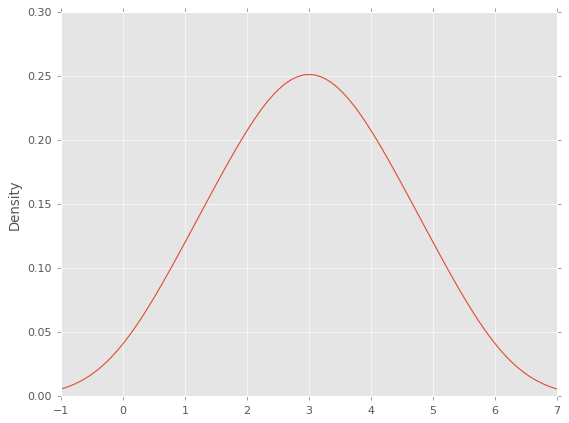

In [84]:
s = pd.Series([1,2,2.5,3,3.5,4,5])
s.plot.kde() # kernel density estimate 곡선으로 출력
# 데이터가 없는 부분은 kernel로 예측 가우시안 분포
plt.show()

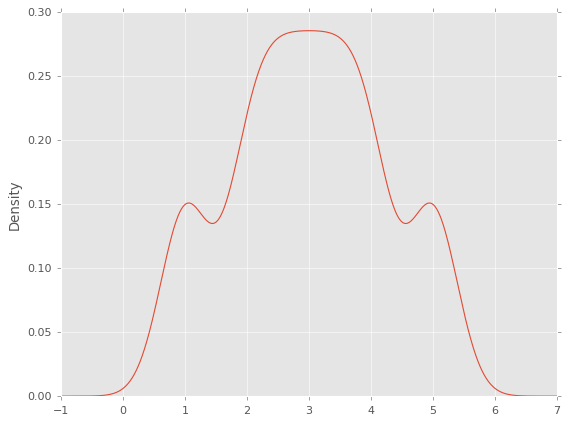

In [87]:
s.plot.kde(bw_method=0.3) # 과적합 bin width(조금씩 예측해서 좀더 세밀하고 깊게-> 작을수록 굴곡이 더심함)
plt.show()

In [88]:
import pandas as pd
# 행인덱스와 열인덱스
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data 

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [95]:

data['area']
# 객체 비교 is None
data.area is data['area']

695662

In [96]:
# 객체에서 변수를 실시간으로 추가하는 것이 가능
# append
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [97]:
data.values # ndarray 로 출력
# numpy함수로 처리

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

In [99]:
data.T

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [100]:
data.values[0]

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

In [102]:
data.iloc[:3,:2] # 행과열 순서대로

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [104]:
data.loc[:'Illinois', :'pop'] #

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [106]:
data.iloc[0,2] = 90
data

,area,pop,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [112]:
data['Florida':'Illinois']

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [113]:
import pandas as pd
import numpy as np

d = {'Name':pd.Series(['김하나','이하나','삼하나','사하나','오하나','육하나','칠하나', '팔하나']),
   'Age':pd.Series([25,26,25,23,30,29,23]),
   'Rating':pd.Series([4.23,3.24,3.98,2.56,3.20,4.6,3.8])}

In [114]:
df = pd.DataFrame(d)
print(df)
print('축',df.axes)
print('데이터 타입', df.dtypes)
print('데이터 타입', df.get_dtype_counts) # unique (중복무)
print('비었나', df.empty) 
print('차원', df.ndim)
print('차수', df.shape)
print('사이즈', df.size)
print('값', df.values)
print(df.head(2))
print(df.tail(2))

  Name   Age  Rating
0  김하나  25.0    4.23
1  이하나  26.0    3.24
2  삼하나  25.0    3.98
3  사하나  23.0    2.56
4  오하나  30.0    3.20
5  육하나  29.0    4.60
6  칠하나  23.0    3.80
7  팔하나   NaN     NaN
축 [RangeIndex(start=0, stop=8, step=1), Index(['Name', 'Age', 'Rating'], dtype='object')]
데이터 타입 Name       object
Age       float64
Rating    float64
dtype: object
데이터 타입 <bound method NDFrame.get_dtype_counts of   Name   Age  Rating
0  김하나  25.0    4.23
1  이하나  26.0    3.24
2  삼하나  25.0    3.98
3  사하나  23.0    2.56
4  오하나  30.0    3.20
5  육하나  29.0    4.60
6  칠하나  23.0    3.80
7  팔하나   NaN     NaN>
비었나 False
차원 2
차수 (8, 3)
사이즈 24
값 [['김하나' 25.0 4.23]
 ['이하나' 26.0 3.24]
 ['삼하나' 25.0 3.98]
 ['사하나' 23.0 2.56]
 ['오하나' 30.0 3.2]
 ['육하나' 29.0 4.6]
 ['칠하나' 23.0 3.8]
 ['팔하나' nan nan]]
  Name   Age  Rating
0  김하나  25.0    4.23
1  이하나  26.0    3.24
  Name   Age  Rating
6  칠하나  23.0     3.8
7  팔하나   NaN     NaN


In [118]:
print('합계',df.sum(),'\n')
print(df.mean(),'\n') # 숫자만 적용
print(df.std(),'\n')# standard deviation 표준편차
print(df.describe(),'\n')  # 숫자데이터에만 적용
print('오브젝트',df.describe(include=['object']),'\n') # unique, top, freq
print(df.describe(include='all'),'\n') 


합계 Name      김하나이하나삼하나사하나오하나육하나칠하나팔하나
Age                            181
Rating                       25.61
dtype: object 

Age       25.857143
Rating     3.658571
dtype: float64 

Age       2.734262
Rating    0.698628
dtype: float64 

             Age    Rating
count   7.000000  7.000000
mean   25.857143  3.658571
std     2.734262  0.698628
min    23.000000  2.560000
25%    24.000000  3.220000
50%    25.000000  3.800000
75%    27.500000  4.105000
max    30.000000  4.600000 

오브젝트        Name
count     8
unique    8
top     오하나
freq      1 

       Name        Age    Rating
count     8   7.000000  7.000000
unique    8        NaN       NaN
top     오하나        NaN       NaN
freq      1        NaN       NaN
mean    NaN  25.857143  3.658571
std     NaN   2.734262  0.698628
min     NaN  23.000000  2.560000
25%     NaN  24.000000  3.220000
50%     NaN  25.000000  3.800000
75%     NaN  27.500000  4.105000
max     NaN  30.000000  4.600000 



In [133]:
data = {'state': ['경기','강원','서울','충북','인천'],
       'year': [2000,2001,2002,2001,2002],
       'pop': [1.5,1.7,3.6,2.4,2.9]}
frame2=pd.DataFrame(data, columns= ['year','state','pop','debt'],index=['one','two','three','four','five'])


In [ ]:
# 1) state만 출력하시오
# 2) debt 열을 추가하고 모든값을 16.5로 입력하시오
# 3) debt를 pd.Series([-1.2,-1.5,-1.7]), index=['two','four','five']로 수정하시오
# 4) 파생변수 'estern'에 주소가 서울인가를 따져 서울은 True아니면 False로 입력되게 하시오

In [139]:
print(frame2['state'])
frame2['debt'] = 16.5
print(frame2)

one      경기
two      강원
three    서울
four     충북
five     인천
Name: state, dtype: object
       year state  pop  debt
one    2000    경기  1.5  16.5
two    2001    강원  1.7  16.5
three  2002    서울  3.6  16.5
four   2001    충북  2.4  16.5
five   2002    인천  2.9  16.5


In [167]:
debt = pd.Series([-1.2,-1.5,-1.7])
index = ['two','four','five']

In [185]:
val = pd.Series([-1.2,-1.5,-1.7], index=['two','four','five'])
frame2['debt'] = val

In [169]:
frame2['estern'] = frame2['state'] == '서울'

In [186]:
frame2

,year,state,pop,debt,estern
one,2000,경기,1.5,NaN,False
two,2001,강원,1.7,-1.2,False
three,2002,서울,3.6,NaN,True
four,2001,충북,2.4,-1.5,False
five,2002,인천,2.9,-1.7,False


In [190]:
print(frame2.columns)
print(frame2['year']['one']) # 열이먼저옴
# 꼭
print(frame2.loc['one','year'])

Index(['year', 'state', 'pop', 'debt', 'estern'], dtype='object')
2000
2000


In [ ]:
# 시간 함수
# 리눅스 : timestamp 1970.1.1 이후로 경과된 mili초로 표현
# pandas 에서는 nano 초 까지 표현..
# 시간 인덱스 : 시계열 분석 : DataTimeIndex, PeriodIndex 주기값
# 파이썬 : time.time() : 2000.1.1 부터 경과된 mili 초로 표현
# datetime (날짜와 시간을 표현)

In [62]:
import time
print(time.time()) # 밀리초로 표현
print(time.localtime()) # 년월일 시분초
yesterday = time.localtime(time.time()-60*60*24) # 시간연산
yesterday
print(yesterday)
time.strftime('%Y %m %d') # 시간을 문자열로 변경해서 출력

1578407282.637734
time.struct_time(tm_year=2020, tm_mon=1, tm_mday=7, tm_hour=23, tm_min=28, tm_sec=2, tm_wday=1, tm_yday=7, tm_isdst=0)
time.struct_time(tm_year=2020, tm_mon=1, tm_mday=6, tm_hour=23, tm_min=28, tm_sec=2, tm_wday=0, tm_yday=6, tm_isdst=0)


'2020 01 07'

In [63]:
time.time()-60*60*24  # 하루전

1578320888.1848722

In [30]:
from datetime import date, time, datetime, timedelta # 시간차
now = datetime.now()
print(now)
now.year, now.month, now.day
now.timestamp() # 시간을 밀리초로 표현하고 싶을때.

2020-01-08 13:14:01.509710


1578456841.50971

In [32]:
now_str=now.strftime('%Y-%m-%d %H:%M:%S') # 년월일시분초 => 문자열
now_str

'2020-01-08 13:14:01'

In [202]:
datetime.strptime(now_str, '%Y-%m-%d %H:%M:%S') # '2020-01-07 16:55:40'

# 날짜 형식으로 변환

datetime.datetime(2020, 1, 7, 16, 55, 40)

In [204]:
delta = datetime(2020,1,7) - datetime(1997,1,20,6,35)
print("시간차는 = ", delta, delta.days, delta.seconds)

시간차는 =  8386 days, 17:25:00 8386 62700


In [206]:
start = datetime(2020,1,7)
print(start + timedelta(12)) # 기본이 날짜
start + timedelta(hours=-5)

2020-01-19 00:00:00


datetime.datetime(2020, 1, 6, 19, 0)

In [223]:
import pandas as pd
print(pd.datetime.now())
print(pd.Timestamp('2017-03-01'))
print(pd.Timestamp(1587687251,unit='s'))

2020-01-07 17:14:31.758973
2017-03-01 00:00:00
2020-04-24 00:14:11


In [221]:
# Datatime Index 생성 : 행 : Index, 열키 : columns
print(pd.date_range('11:00',"13:00", freq="30min"))
print("시간으로", pd.date_range("11:00","13:30", freq="30min").time)
print(pd.date_range("11:00","13:30",freq="H")) # hour

DatetimeIndex(['2020-01-07 11:00:00', '2020-01-07 11:30:00',
               '2020-01-07 12:00:00', '2020-01-07 12:30:00',
               '2020-01-07 13:00:00'],
              dtype='datetime64[ns]', freq='30T')
시간으로 [datetime.time(11, 0) datetime.time(11, 30) datetime.time(12, 0)
 datetime.time(12, 30) datetime.time(13, 0) datetime.time(13, 30)]
DatetimeIndex(['2020-01-07 11:00:00', '2020-01-07 12:00:00',
               '2020-01-07 13:00:00'],
              dtype='datetime64[ns]', freq='H')


In [226]:
# 지정된 시간을 DatetimeIndex 로 생성
print(pd.to_datetime(pd.Series(['Jul 31, 2009','2010-01-10',None])))
print(pd.to_datetime(['2005/11/23','2010.12.31',None]))

0   2009-07-31
1   2010-01-10
2          NaT
dtype: datetime64[ns]
DatetimeIndex(['2005-11-23', '2010-12-31', 'NaT'], dtype='datetime64[ns]', freq=None)


In [225]:
print(pd.date_range('1/1/2017',periods=5)) # 일간격 : 기본주기

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05'],
              dtype='datetime64[ns]', freq='D')


In [228]:
print(pd.date_range('1/1/2017',periods=5,freq='M'))

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31'],
              dtype='datetime64[ns]', freq='M')


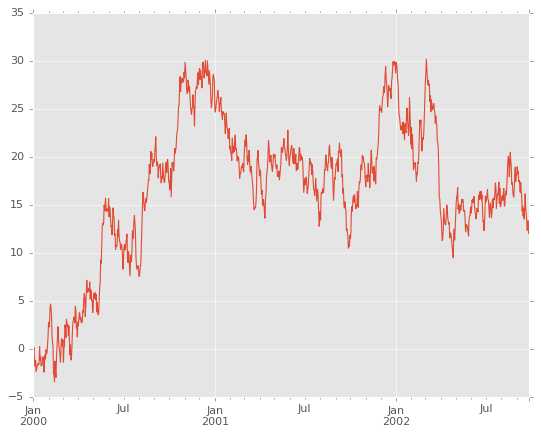

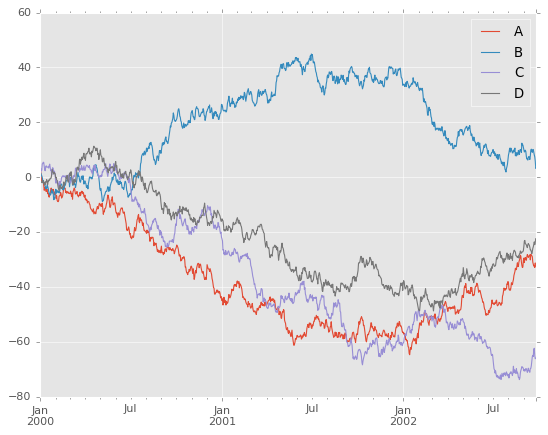

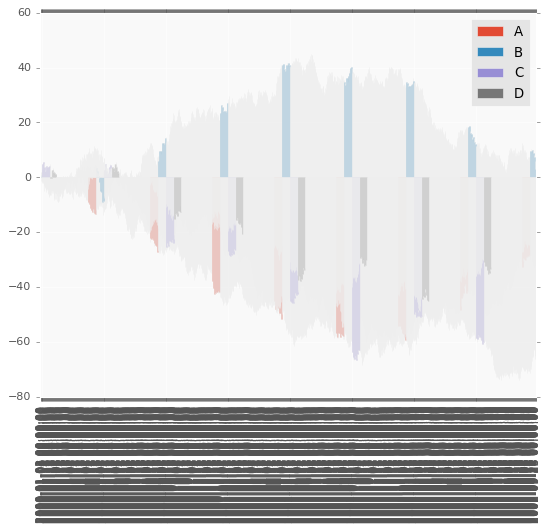

In [229]:
ts = pd.Series(np.random.randn(1000),
              index=pd.date_range('1/1/2000',periods=1000))
ts = ts.cumsum()
ts.plot()

df = pd.DataFrame(np.random.randn(1000,4), index=ts.index,columns=list('ABCD'))
df = df.cumsum()
df.plot()
df.plot.bar()

# 문제 다음 데이터를 데이터프레임에 저장하시요
#         지역  2018     2017 2016 2015 2015-2018 증가율
# 서울 수도권  9904312 9631482 9762546 9853972    0.0283
# 부산 경상권  3448737 3393191 3512547 3655437    0.0163
# 인천 수도권1  2890451 2632035 2517680 2466338    0.0982
# 대구 경상권1  2466052 2431774 2456016 2473990    0.0141 

In [286]:
data1 = {'state': ['경기','강원','서울','충북','인천'],
       'year': [2000,2001,2002,2001,2002],
       'pop': [1.5,1.7,3.6,2.4,2.9] }


# frame2=pd.DataFrame(data, columns= ['year','state','pop','debt'],index=['one','two','three','four','five'])
# data1

In [230]:
columns = ['지역', '2018','2017','2016','2015','2015-2018 증가율'],index = ['서울', '부산', '인천', '대구']


In [309]:
# 문제 : 2015-2018 증가율 을 %로 변경하시오
# 문제 : 2015-2017의 증가율을 구해서 변수를 추가하시오
# (열이름:"2015-2017 증가율")
# frame(2017년 - 2015년)
frame["2015-2018 증가율"] = frame["2015-2018 증가율"]*100
frame['2015-2017 증가율'] = frame['2017']/frame['2015']-1 
frame['2015-2017 증가율'] = frame['2015-2017 증가율']*100

In [308]:
import pandas as pd
# '지역': ['지역',2018,2017,2016,2015],
data = {'지역' : ['수도권','경상권','수도권','경상권'] ,
        '2018': [9904312,3448737,2890451,2466052],
        '2017': [9631482,3393191,2632035,2431774],
        '2016': [9762546,3512547,2517680,2456016],
        '2015': [9853972,3655437,2466338,2473990],
        '2015-2018 증가율': [0.0283,0.0163,0.0982,0.0141]}
frame = pd.DataFrame(data,index=['서울','부산','인천','대구'])

In [310]:
frame

,지역,2018,2017,2016,2015,2015-2018 증가율,2015-2017 증가율
서울,수도권,9904312,9631482,9762546,9853972,2.83,-2.257871
부산,경상권,3448737,3393191,3512547,3655437,1.63,-7.174135
인천,수도권,2890451,2632035,2517680,2466338,9.82,6.718341
대구,경상권,2466052,2431774,2456016,2473990,1.41,-1.706393


In [296]:
# frame2 = pd.DataFrame(data,columns = ['지역', '2018','2017','2016','2015','2015-2018 증가율'],index = ['서울', '부산', '인천', '대구'])
# frame2